In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup successful!")


Setup successful!


In [3]:
df = pd.read_csv("netflix_titles.csv")
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape


(8807, 12)

In [5]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['director'] = df['director'].fillna('Unknown')


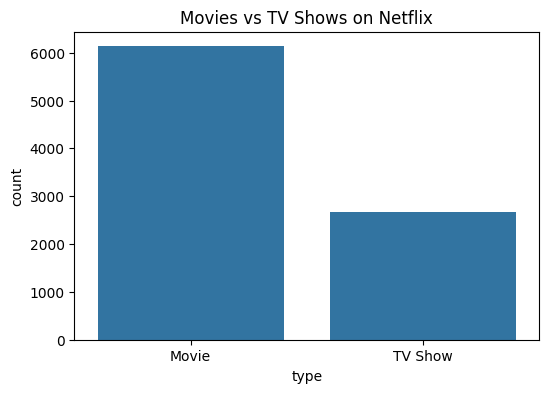

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()


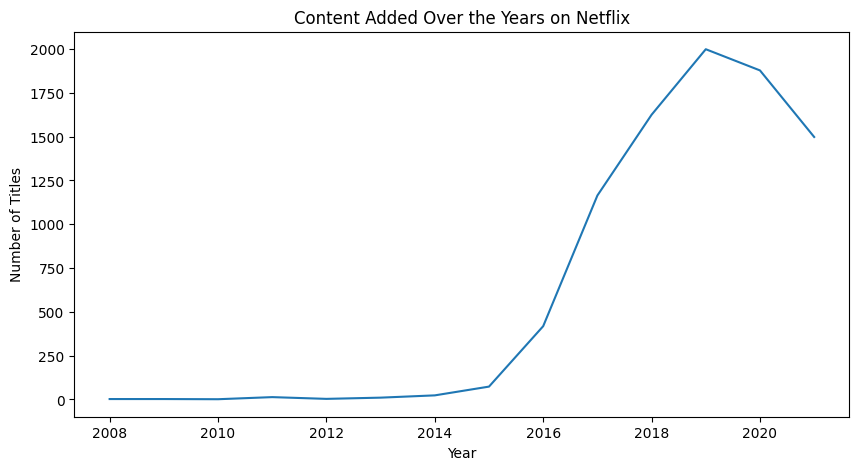

In [10]:
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title("Content Added Over the Years on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


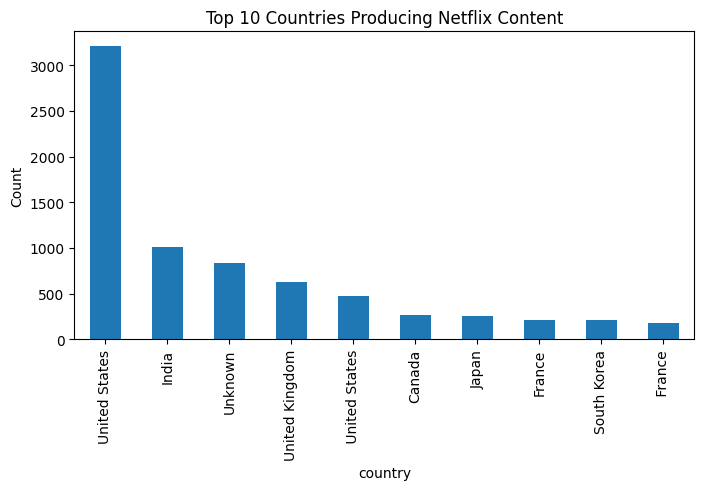

In [11]:
top_countries = df['country'].str.split(',').explode().value_counts().head(10)

plt.figure(figsize=(8,4))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries Producing Netflix Content")
plt.ylabel("Count")
plt.show()


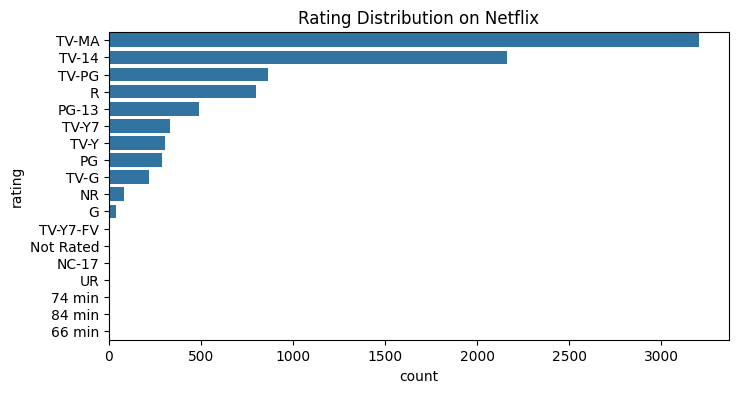

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Rating Distribution on Netflix")
plt.show()


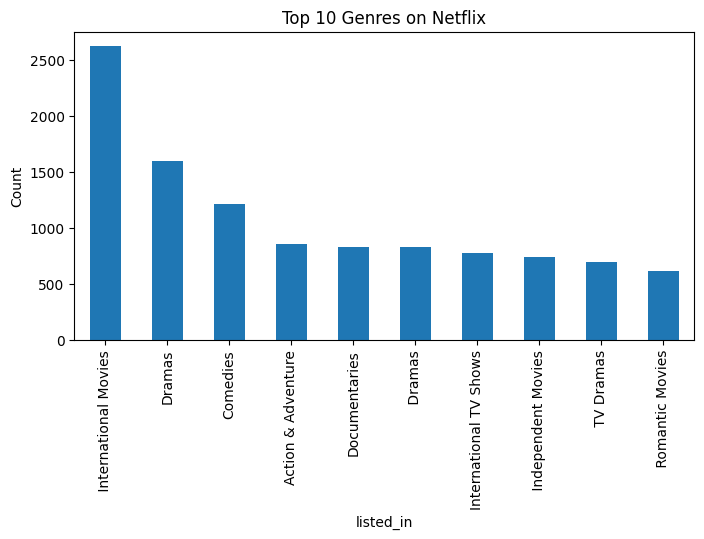

In [13]:
genres = df['listed_in'].str.split(',').explode().value_counts().head(10)

plt.figure(figsize=(8,4))
genres.plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Count")
plt.show()


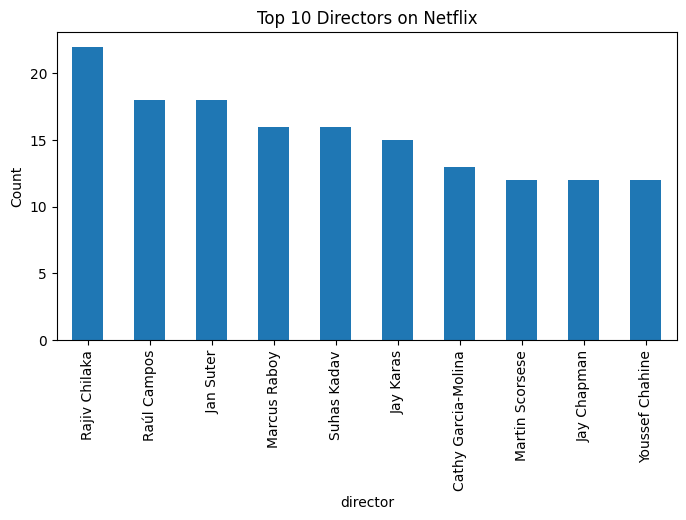

In [14]:
top_directors = df[df['director'] != 'Unknown']['director'] \
                .str.split(',').explode().value_counts().head(10)

plt.figure(figsize=(8,4))
top_directors.plot(kind='bar')
plt.title("Top 10 Directors on Netflix")
plt.ylabel("Count")
plt.show()


In [15]:
from collections import Counter

words = ' '.join(df['title']).lower().split()
common_words = Counter(words).most_common(10)

common_words


[('the', 2227),
 ('of', 708),
 ('a', 352),
 ('in', 284),
 ('and', 234),
 ('to', 199),
 ('&', 179),
 ('love', 151),
 ('my', 144),
 ('2', 104)]

## Netflix Data Analysis – Conclusion

- Netflix has more **Movies** than TV Shows  
- Content production increased rapidly after **2015**  
- **USA** is the largest content producer  
- **Drama & Comedy** dominate the platform  
- **TV-MA** is the most common rating  
